In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [18]:
salary = pd.read_csv('RealEstate.csv')

X = salary['X2 house age']
y = salary['Y house price of unit area']

def mean_squared_error(y, m, b, x):
    n = len(y)
    total = np.sum((y - (m * x + b)) ** 2)
    return total / n

def ddm(y, m, b, x):
    n = len(y)
    total = np.sum((y - (m * x + b)) * x)
    return -2 / n * total

def ddb(y, m, b, x):
    n = len(y)
    total = np.sum(y - (m * x + b))
    return -2 / n * total

learning_rate = 0.0001

m = -10
b = 50
for i in range(5000):
    m -= learning_rate * ddm(y, m, b, X)
    b -= learning_rate * ddb(y, m, b, X)
    if i % 10000 == 0:
        print(mean_squared_error(y, m, b, X))
print(m, b)

33031.44225433638
-0.48775000382908057 48.3426276804552


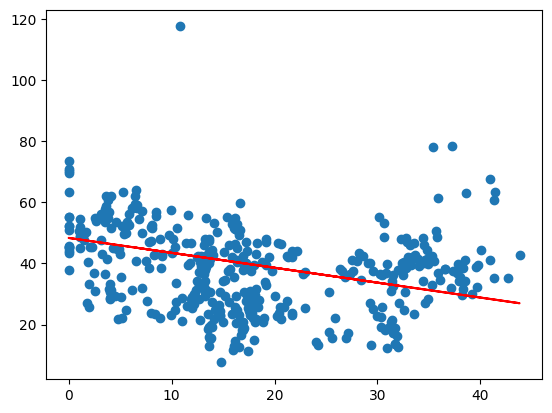

In [19]:
plt.scatter(X, y)
plt.plot(X, m * X + b, color='red')